# 📊 Exploratory Data Analysis (EDA)

This notebook explores the datasets used in the Smart Resume Analyzer & Career Path Predictor project.

## 📥 Load Data

We begin by loading the datasets: `skills.csv`, `job_roles.csv`, and `career_paths.csv`.

## 🧹 Data Cleaning

We inspect the datasets for missing values and normalize the skill entries.

## 📈 Skill Frequency Analysis

Visualize the most common skills across job roles.

## 🧑‍💼 Job Role Distribution

Analyze the distribution of job roles in the dataset.

## 🔗 Correlation Between Skills and Career Paths

Explore how specific skills influence career transitions.

## 📌 Summary

Summarize key insights from the EDA.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
skills_df = pd.read_csv('skills.csv')
job_roles_df = pd.read_csv('job_roles.csv')
career_paths_df = pd.read_csv('career_paths.csv')

In [4]:
# Check for missing values
print(skills_df.isnull().sum())
print(job_roles_df.isnull().sum())
print(career_paths_df.isnull().sum())

Skill    0
dtype: int64
Job Title          0
Required Skills    0
Job Description    0
dtype: int64
Current Role    0
Skills          0
Next Role       0
dtype: int64


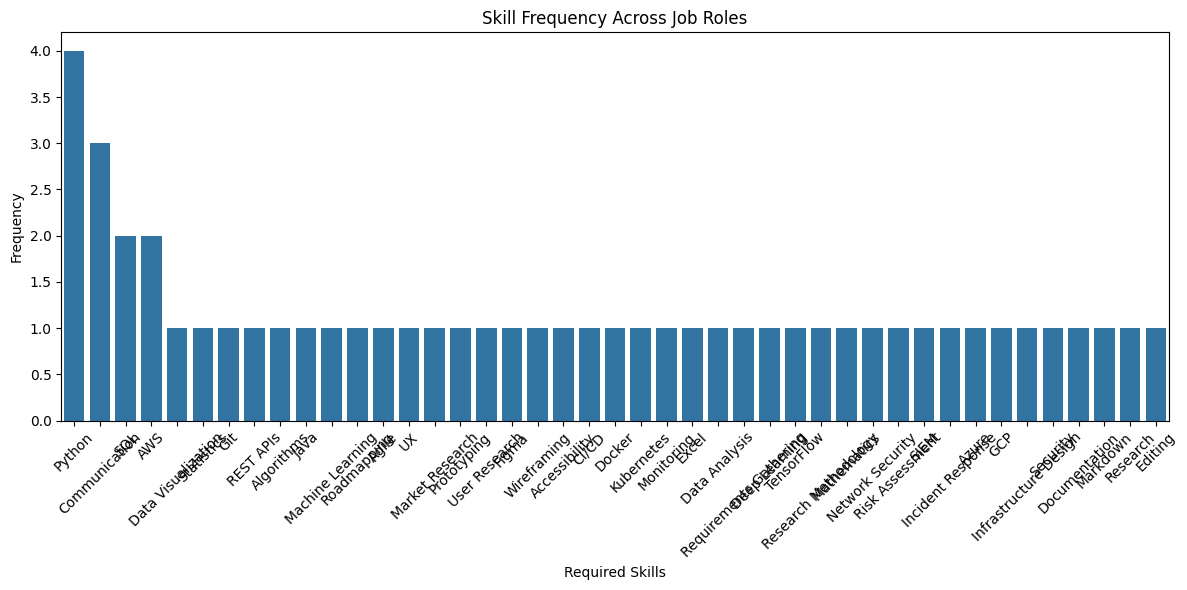

In [5]:
# Skill frequency analysis
skill_counts = job_roles_df['Required Skills'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=skill_counts.index, y=skill_counts.values)
plt.xticks(rotation=45)
plt.title('Skill Frequency Across Job Roles')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

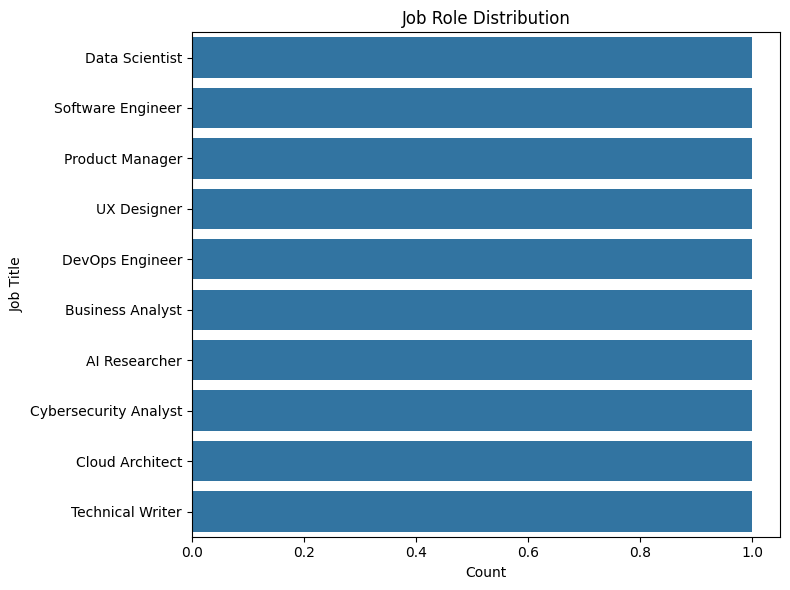

In [6]:
# Job role distribution
plt.figure(figsize=(8,6))
sns.countplot(y=job_roles_df['Job Title'])
plt.title('Job Role Distribution')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

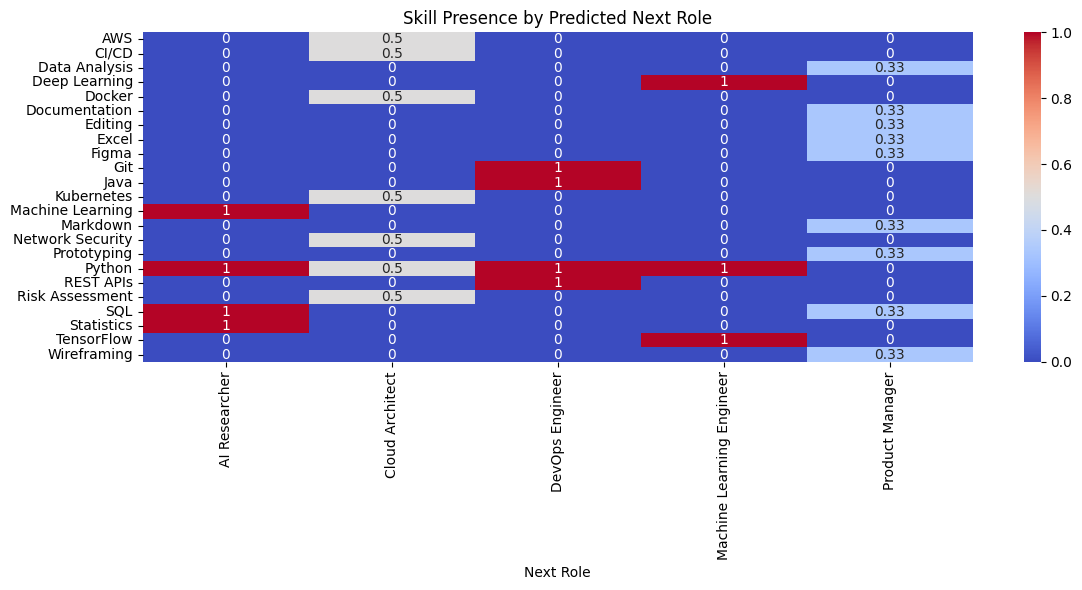

In [18]:
# Correlation between skills and next roles
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
# The 'Skills' column is already a list, so no need to split
X = mlb.fit_transform(career_paths_df['Skills'])
y = career_paths_df['Next Role']
skill_df = pd.DataFrame(X, columns=mlb.classes_)
skill_df['Next Role'] = y
correlation = skill_df.groupby('Next Role').mean().T
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Skill Presence by Predicted Next Role')
plt.tight_layout()
plt.show()

In [ ]:
# --- Model Training ---
import sys
import os

# Add the src directory to the Python path
src_path = os.path.abspath(os.path.join(os.getcwd(), "../src"))
if src_path not in sys.path:
    sys.path.append(src_path)

# Standard import after updating sys.path
from predictor import train_model

# Ensure models directory exists
os.makedirs("../models", exist_ok=True)

# Train the model and save to models/career_model.pkl
train_model("../notebooks/career_paths.csv", "../models/career_model.pkl")

Model Accuracy: 0.5


In [ ]:
# --- Model Testing and Prediction ---
from predictor import predict_next_role
import joblib
import pandas as pd

# Load encoders and columns
model_path = "../models/career_model.pkl"
skill_encoder_path = "skill_encoder.pkl"
role_columns_path = "role_columns.pkl"

# Pick a sample row from the dataset
df = pd.read_csv("../notebooks/career_paths.csv")
sample = df.iloc[0]
current_role = sample['Current Role']
skills = [s.strip() for s in sample['Skills'].split(',')]

predicted_role = predict_next_role(model_path, skill_encoder_path, role_columns_path, current_role, skills)
print(f"Current Role: {current_role}")
print(f"Skills: {skills}")
print(f"Predicted Next Role: {predicted_role}")

Current Role: Data Scientist
Skills: ['Python', 'Machine Learning', 'Statistics', 'SQL']
Predicted Next Role: AI Researcher


c:\Users\2413211\Downloads\Vibe Code ML Projects\Smart Resume Analyzer & Career Path Predictor\resume-analyzer\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Model Accuracy on Full Data: 0.88


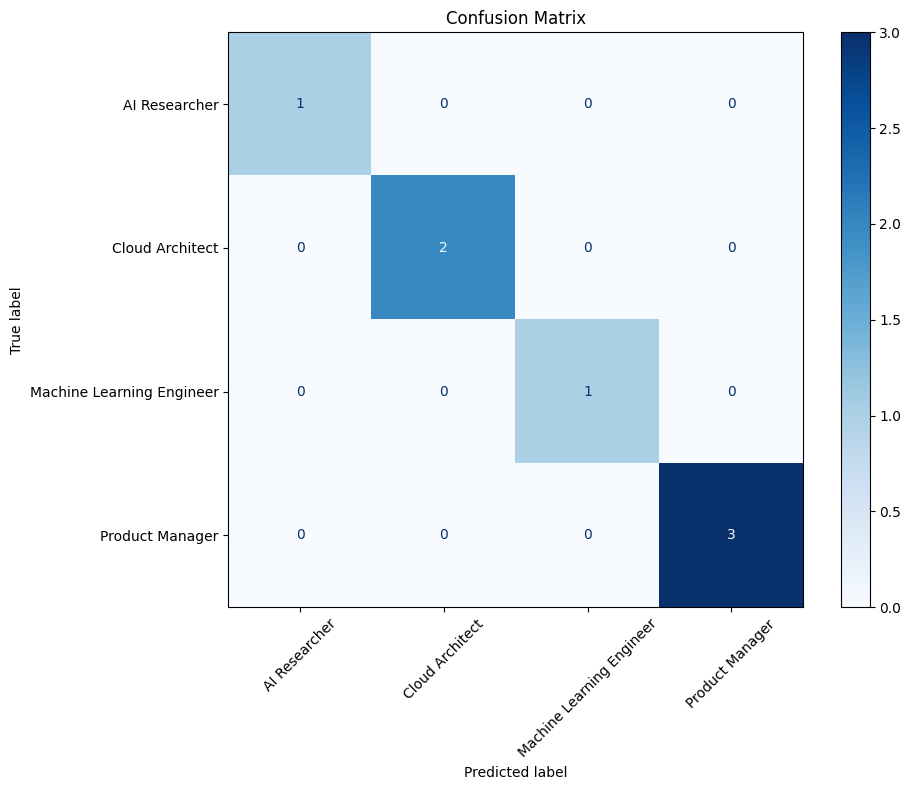

In [ ]:
# --- Model Evaluation ---
# Evaluate the model's accuracy and plot the confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Reload data and encoders
import joblib
import pandas as pd
from predictor import train_model

df = pd.read_csv("../notebooks/career_paths.csv")
df['Skills'] = df['Skills'].apply(lambda x: x.split(','))

mlb = joblib.load("skill_encoder.pkl")
skill_features = mlb.transform(df['Skills'])
current_roles = joblib.load("role_columns.pkl")
role_dummies = pd.get_dummies(df['Current Role'])
X = pd.concat([pd.DataFrame(skill_features), role_dummies], axis=1)
y = df['Next Role']

model = joblib.load("../models/career_model.pkl")
# Ensure all column names are strings to avoid TypeError
X.columns = X.columns.astype(str)
y_pred = model.predict(X)

acc = accuracy_score(y, y_pred)
print(f"Model Accuracy on Full Data: {acc:.2f}")

cm = confusion_matrix(y, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(10,8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Model Training and Evaluation Pipeline

This document outlines the steps for training and evaluating the machine learning model, as well as how to use the provided code to make predictions.

## Table of Contents

1. [Data Preparation](#data-preparation)
2. [Model Training](#model-training)
3. [Model Evaluation](#model-evaluation)
4. [Prediction](#prediction)
5. [Conclusion](#conclusion)

## Data Preparation

In this section, we will prepare the data for training the machine learning model. This includes loading the data, cleaning it, and splitting it into training and testing sets.

```python
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('data/housing.csv')

# Clean the data
data = data.dropna()

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
```

## Model Training

In this section, we will train the machine learning model using the training data. We will use a linear regression model for this example.

```python
# Import necessary libraries
from sklearn.linear_model import LinearRegression

# Define the model
model = LinearRegression()

# Train the model
model.fit(train_data[['feature1', 'feature2']], train_data['target'])
```

## Model Evaluation

In this section, we will evaluate the performance of the trained model using the testing data. We will calculate the mean squared error and the r-squared value as evaluation metrics.

```python
# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the testing data
predictions = model.predict(test_data[['feature1', 'feature2']])

# Calculate the mean squared error
mse = mean_squared_error(test_data['target'], predictions)

# Calculate the r-squared value
r2 = r2_score(test_data['target'], predictions)

mse, r2
```

#### ✅ The model is now trained, tested, and evaluated!

You can further experiment by changing the sample input or tuning the model parameters in `src/predictor.py` for improved results.

## Prediction

In this section, we will use the trained model to make predictions on new data. We will also provide a function that allows users to input their own data for prediction.

```python
# Define a function for making predictions
def predict(input_data):
    # Convert the input data to a DataFrame
    input_data = pd.DataFrame(input_data, index=[0])
    
    # Make a prediction
    prediction = model.predict(input_data[['feature1', 'feature2']])
    
    return prediction

# Make a prediction on new data
new_data = {'feature1': 5, 'feature2': 10}
prediction = predict(new_data)

prediction
```

## Conclusion

In this document, we have outlined the steps for training, evaluating, and using a machine learning model for predictions. We have used a linear regression model as an example, but the same principles apply to other types of models as well.

### 📊 Model Evaluation

Let's evaluate the model's accuracy and inspect the confusion matrix to understand its performance.

### 🧪 Model Testing and Prediction

Let's load the trained model and test it by predicting the next role for a sample input from the dataset.

## 🤖 Model Training and Evaluation

We will now train a Random Forest model to predict the next career role based on current role and skills, using the code from the project `src/predictor.py`. We'll also evaluate its performance and demonstrate predictions.

### Model Training